In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import plotly.express as px
import os
import sys
import pandas as pd
from collections import defaultdict
import numpy as np

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [57]:
from utils import PROJECT_ROOT_DIR, load_json, write_json
from experiments.auto_vs_human.defeasible.results.process_validation import get_valid_paraphrases

In [59]:
social_gpt3 = get_valid_paraphrases('social')
snli_gpt3 = get_valid_paraphrases('snli')

valid      0.928022
invalid    0.071978
Name: paraphrase_valid, dtype: float64
valid      0.959835
invalid    0.040165
Name: paraphrase_valid, dtype: float64


In [60]:
social_gpt3

defaultdict(list,
            {'social.train.15494': [ParaphrasedDefeasibleNLIExample(paraphrase_id='social.train.15494.gpt3.0', original_example={'example_id': 'social.train.15494', 'premise_hypothesis_id': 'social.train.1543', 'data_source': 'social-chem-101', 'source_example_metadata': {'SocialChemSituationUID': 'reddit/amitheasshole/b2df72/cleaned', 'SocialChemSituation': 'rekindling a old friendship with a girl while on a current break from relationship', 'SocialChemROT': 'It is wrong to start a new relationship until the previous one has clearly ended.'}, 'premise': '', 'hypothesis': 'It is wrong to start a new relationship until the previous one has clearly ended.', 'update': "you're overwhelmed by your emotions.", 'update_type': 'weakener', 'label': 0, 'annotated_paraphrases': None}, original_example_id='social.train.15494', update_paraphrase='your emotions are too much for you to handle.', worker_id='gpt3', premise_paraphrase=None, hypothesis_paraphrase=None, automatic_system_

In [20]:
paraphrases = pd.read_csv('abductive/results/validation_annotation_files/pilot/qcpg_paraphrases_hyp1_validated.csv')

In [21]:
paraphrases = paraphrases[paraphrases['hyp1_paraphrase_invalid'] == 'valid']

In [28]:
lexical = []
syntactic = []
semantic = []

In [29]:
for i in paraphrases.settings.map(eval):
    lexical.append(i['lexical'])
    syntactic.append(i['syntactic'])
    semantic.append(i['semantic'])

<AxesSubplot:ylabel='Frequency'>

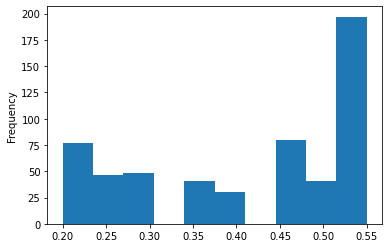

In [32]:
pd.Series(lexical).plot.hist()

<AxesSubplot:ylabel='Frequency'>

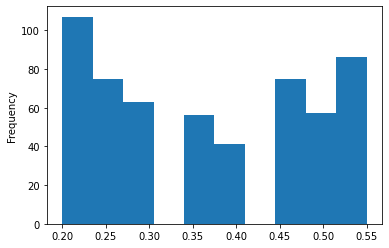

In [33]:
pd.Series(syntactic).plot.hist()

<AxesSubplot:ylabel='Frequency'>

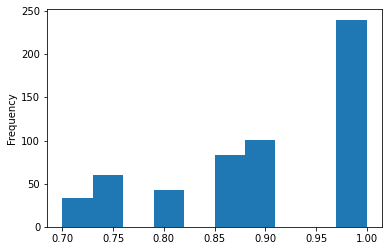

In [34]:
pd.Series(semantic).plot.hist()

In [53]:
from experiments.auto_vs_human.abductive.results.process_validation import process_label_studio_validations, get_valid_paraphrases

In [55]:
get_valid_paraphrases()

valid      0.929405
invalid    0.070595
Name: paraphrase_valid, dtype: float64
valid      0.920091
invalid    0.079338
NaN        0.000571
Name: paraphrase_valid, dtype: float64


defaultdict(<function experiments.auto_vs_human.abductive.results.process_validation.get_valid_paraphrases.<locals>.<lambda>()>,
            {'anli.train.easy.103323': defaultdict(list,
                         {'hyp1': ['Travis saw another biker get hit by a car.',
                           'Travis witnessed another biker getting hit.',
                           'Travis observed as another biker got hit by a car.',
                           'Travis saw another biker get struck by a car.',
                           'He saw another cyclist being hit by a car.',
                           'Travis saw another cyclist being hit by a car.',
                           'One day, Travis saw another biker get hit by a car.',
                           'While Travis was riding his bike, he saw another biker get hit by a car.',
                           'Travis saw how another cyclist got hit by a car.'],
                          'hyp2': ['The other cyclist got hit by a car.',
             